In [1]:
import math
import numpy as np
import scipy.io
import matplotlib.pyplot as plt
from main import nmf
np.random.seed(42)

In [2]:
%matplotlib inline

In [3]:
def zeros_mask(arr):
    m, n = arr.shape
    indices = np.random.choice(m * n, replace=False, size=int(m * n * 0.2))
    arr[np.unravel_index(indices, (m, n))] = 0
    return arr

In [4]:
mat = scipy.io.loadmat('Urban.mat')
X = mat['X']

In [5]:
m, n = X.shape # (162, 94249)
num_col = int(math.sqrt(n)) # 307

In [6]:
X3d = X.reshape(m, num_col, num_col, order='F') # order specified to match MATLAB

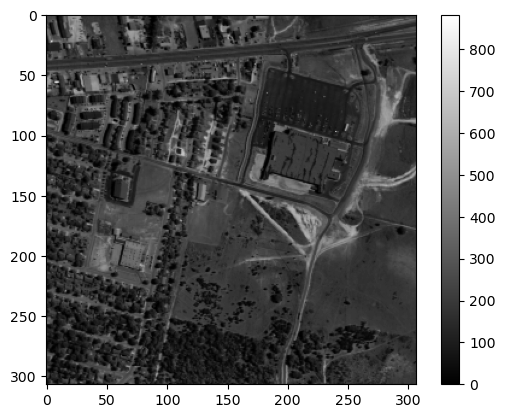

In [7]:
plt.imshow(X3d[100, :, :], cmap='gray')
plt.colorbar()

## Small scale test, expected r = 3

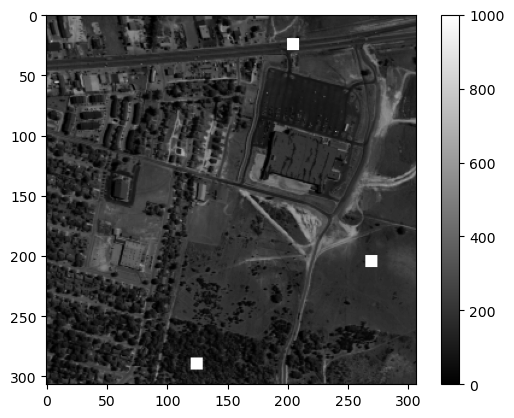

In [8]:
img = X3d[100, :, :].copy()
img[285: 295, 120: 130] = 1000 # trees
img[200: 210, 265: 275] = 1000 # grass
img[20: 30, 200: 210] = 1000 # asphalt
plt.imshow(img, cmap='gray')
plt.colorbar()

In [9]:
trees3d = X3d[:, 285: 295, 120: 130] # (162, 10, 10)
grass3d = X3d[:, 200: 210, 265: 275] # (162, 10, 10)
asphalt3d = X3d[:, 20: 30, 200: 210] # (162, 10, 10)

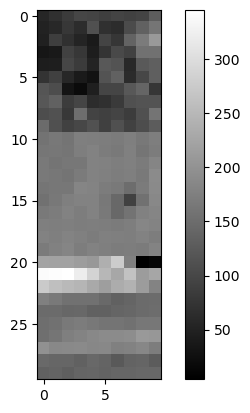

In [10]:
smallX3d = np.hstack([trees3d, grass3d, asphalt3d]) # (162, 30, 10)
plt.imshow(smallX3d[100, :, :], cmap='gray')
plt.colorbar()

In [11]:
smallX = smallX3d.reshape(m, -1, order='F') # (162, 300)

In [12]:
m,n = smallX.shape
r = 6
W_ini = zeros_mask(np.random.rand(m, r))
H_ini = zeros_mask(np.random.rand(r, n))

In [13]:
_lambda = 0.4
Wb, Hb, Wl, Hl, fscores, gscores = nmf(smallX, W_ini.copy(), H_ini.copy(), _lambda=_lambda, itermax=1000)

Iteration: 1, f=4471.756714237441, g=1066.0889413985374,  total=4898.192290796856
Iteration: 2, f=3045.462596754036, g=955.443007394314,  total=3427.6397997117615
Iteration: 3, f=2019.63882069291, g=910.5544841956364,  total=2383.8606143711645
Iteration: 4, f=1685.0302243233004, g=858.991971611191,  total=2028.6270129677769
Iteration: 5, f=1520.920725853595, g=820.4745271854695,  total=1849.1105367277828
Iteration: 6, f=1397.440638524834, g=790.5828990523088,  total=1713.6737981457575
Iteration: 7, f=1304.832365191422, g=766.80576772235,  total=1611.554672280362
Iteration: 8, f=1232.3719207581996, g=747.5928475069535,  total=1531.409059760981
Iteration: 9, f=1174.309293135714, g=731.6915959335108,  total=1466.9859315091182
Iteration: 10, f=1128.466036008218, g=718.1744633849186,  total=1415.7358213621856
Iteration: 11, f=1093.4411815153796, g=706.4507600236633,  total=1376.021485524845
Iteration: 12, f=1066.8718404075983, g=696.1337758666702,  total=1345.3253507542663
Iteration: 13, f=

Iteration: 101, f=721.180396069948, g=527.906241032715,  total=932.342892483034
Iteration: 102, f=720.0141960170095, g=527.4140268498692,  total=930.9798067569571
Iteration: 103, f=718.8688900845432, g=526.9257466038858,  total=929.6391887260975
Iteration: 104, f=717.7455132872781, g=526.4411727780996,  total=928.3219823985179
Iteration: 105, f=716.6447550122443, g=525.9601474054101,  total=927.0288139744084
Iteration: 106, f=715.5668957725179, g=525.4821117126036,  total=925.7597404575594
Iteration: 107, f=714.5132546948267, g=525.0064818305347,  total=924.5158474270406
Iteration: 108, f=713.4833174686098, g=524.5336485977818,  total=923.2967769077226
Iteration: 109, f=712.4777366653228, g=524.0636522521122,  total=922.1031975661678
Iteration: 110, f=711.496832121643, g=523.5962435632824,  total=920.935329546956
Iteration: 111, f=710.540256608208, g=523.1311329058234,  total=919.7927097705374
Iteration: 112, f=709.608053102069, g=522.6685559486966,  total=918.6754754815477
Iteration: 

Iteration: 200, f=676.1453228042552, g=491.3873533221786,  total=872.7002641331267
Iteration: 201, f=675.9829928895509, g=491.10286064630304,  total=872.4241371480722
Iteration: 202, f=675.8223762676815, g=490.8191008537545,  total=872.1500166091834
Iteration: 203, f=675.6634106603234, g=490.53608885593985,  total=871.8778462026994
Iteration: 204, f=675.5060989709183, g=490.2537832005715,  total=871.6076122511469
Iteration: 205, f=675.3504123062798, g=489.9721968766826,  total=871.3392910569529
Iteration: 206, f=675.1963509443921, g=489.69134002870675,  total=871.0728869558748
Iteration: 207, f=675.0439047571459, g=489.4112133782499,  total=870.8083901084459
Iteration: 208, f=674.8930646140036, g=489.131819583352,  total=870.5457924473444
Iteration: 209, f=674.743822978429, g=488.8531212054959,  total=870.2850714606274
Iteration: 210, f=674.5961137702136, g=488.575134810426,  total=870.026167694384
Iteration: 211, f=674.449927371454, g=488.2978761844363,  total=869.7690778452286
Iterat

Iteration: 299, f=665.992949562325, g=466.70706069347546,  total=852.6757738397151
Iteration: 300, f=665.9338433888172, g=466.4890545886332,  total=852.5294652242706
Iteration: 301, f=665.8752600033954, g=466.2715537645342,  total=852.3838815092091
Iteration: 302, f=665.8171955190078, g=466.05455643827514,  total=852.2390180943179
Iteration: 303, f=665.7596336610712, g=465.8380605142952,  total=852.0948578667893
Iteration: 304, f=665.7025726636489, g=465.6220620689483,  total=851.9513974912282
Iteration: 305, f=665.6460096923487, g=465.4065574568521,  total=851.8086326750895
Iteration: 306, f=665.5899279006946, g=465.1915400782414,  total=851.6665439319912
Iteration: 307, f=665.5343303385924, g=464.97700152153806,  total=851.5251309472077
Iteration: 308, f=665.4792201605459, g=464.76294104558355,  total=851.3843965787793
Iteration: 309, f=665.4245911895042, g=464.5493574511679,  total=851.2443341699714
Iteration: 310, f=665.3704367338539, g=464.336249147628,  total=851.1049363929051
It

Iteration: 398, f=661.8568032489469, g=447.1979003183352,  total=840.735963376281
Iteration: 399, f=661.8267357865437, g=447.01906217211047,  total=840.6343606553879
Iteration: 400, f=661.7968259989917, g=446.8405399841495,  total=840.5330419926515
Iteration: 401, f=661.7670699989671, g=446.6623323688995,  total=840.432002946527
Iteration: 402, f=661.7374647038104, g=446.48443779680343,  total=840.3312398225318
Iteration: 403, f=661.7080082770424, g=446.306854741115,  total=840.2307501734883
Iteration: 404, f=661.6786996745267, g=446.12958167503,  total=840.1305323445387
Iteration: 405, f=661.6495376418802, g=445.9526169807641,  total=840.0305844341858
Iteration: 406, f=661.6204858633756, g=445.77594814644124,  total=839.9308651219521
Iteration: 407, f=661.5915663564291, g=445.5995753777532,  total=839.8313965075304
Iteration: 408, f=661.5627926804234, g=445.42349805821937,  total=839.7321919037112
Iteration: 409, f=661.5341710152519, g=445.24771555900867,  total=839.6332572388553
Iter

Iteration: 497, f=659.3903545624045, g=431.43419741658647,  total=831.964033529039
Iteration: 498, f=659.3693221977574, g=431.28952746562067,  total=831.8851331840057
Iteration: 499, f=659.3483390731705, g=431.1450310148641,  total=831.8063514791161
Iteration: 500, f=659.3274048713782, g=431.00070772320015,  total=831.7276879606583
Iteration: 501, f=659.3065196495511, g=430.856557126835,  total=831.649142500285
Iteration: 502, f=659.2856884257333, g=430.71255584946647,  total=831.5707107655198
Iteration: 503, f=659.2638752183631, g=430.56870818871874,  total=831.4913584938506
Iteration: 504, f=659.2416052716989, g=430.4250231708463,  total=831.4116145400374
Iteration: 505, f=659.2195699410769, g=430.28150086056615,  total=831.3321702853034
Iteration: 506, f=659.1977940198304, g=430.13814090364485,  total=831.2530503812884
Iteration: 507, f=659.1761856588704, g=429.994943288663,  total=831.1741629743356
Iteration: 508, f=659.1546745450148, g=429.8519081160037,  total=831.0954377914163
I

Iteration: 596, f=657.3796998072174, g=417.8646051014205,  total=824.5255418477857
Iteration: 597, f=657.3608402761869, g=417.73441975968433,  total=824.4546081800606
Iteration: 598, f=657.3420510017423, g=417.6043510205916,  total=824.383791409979
Iteration: 599, f=657.3233307074734, g=417.474398392963,  total=824.3130900646586
Iteration: 600, f=657.3046789310256, g=417.3445614092467,  total=824.2425034947242
Iteration: 601, f=657.286095467075, g=417.214839666654,  total=824.1720313337366
Iteration: 602, f=657.2675799098987, g=417.0852328380477,  total=824.1016730451178
Iteration: 603, f=657.2491316341187, g=416.95574064852775,  total=824.0314278935298
Iteration: 604, f=657.2307496450219, g=416.82636288765434,  total=823.9612948000836
Iteration: 605, f=657.2124328779636, g=416.697099371897,  total=823.8912726267224
Iteration: 606, f=657.1941799446874, g=416.5679499498069,  total=823.8213599246102
Iteration: 607, f=657.1759895747657, g=416.4389144898109,  total=823.7515553706901
Iterat

Iteration: 695, f=655.7103678311139, g=405.51110510829346,  total=817.9148098744313
Iteration: 696, f=655.6948507169743, g=405.39155263232965,  total=817.8514717699062
Iteration: 697, f=655.6793519780301, g=405.27209976258706,  total=817.788191883065
Iteration: 698, f=655.6638715128558, g=405.15274623032417,  total=817.7249700049855
Iteration: 699, f=655.6484092501996, g=405.03349176553655,  total=817.6618059564142
Iteration: 700, f=655.6329650764885, g=404.9143361027741,  total=817.5986995175981
Iteration: 701, f=655.6175389525617, g=404.79527897600553,  total=817.5356505429639
Iteration: 702, f=655.6021307590565, g=404.6763201161402,  total=817.4726588055127
Iteration: 703, f=655.5867404179554, g=404.5574592647116,  total=817.4097241238401
Iteration: 704, f=655.5713678613087, g=404.43869615215084,  total=817.346846322169
Iteration: 705, f=655.556013051138, g=404.32003051789326,  total=817.2840252582954
Iteration: 706, f=655.5406759101996, g=404.20146209520755,  total=817.221260748282

Iteration: 794, f=654.2561808619778, g=394.1207763289259,  total=811.9044913935481
Iteration: 795, f=654.2423400096003, g=394.0101345528228,  total=811.8463938307294
Iteration: 796, f=654.2285092457129, g=393.89957132386246,  total=811.7883377752579
Iteration: 797, f=654.2147009872806, g=393.7890869099542,  total=811.7303357512623
Iteration: 798, f=654.2009147471737, g=393.6786814997457,  total=811.672387347072
Iteration: 799, f=654.1871487870432, g=393.56835515805153,  total=811.6144908502638
Iteration: 800, f=654.1734014790496, g=393.4581078466835,  total=811.556644617723
Iteration: 801, f=654.1596716519031, g=393.3479394514747,  total=811.498847432493
Iteration: 802, f=654.1459583831551, g=393.23784982095117,  total=811.4410983115356
Iteration: 803, f=654.1322609787558, g=393.12783877181926,  total=811.3833964874834
Iteration: 804, f=654.1185789609751, g=393.01790610367186,  total=811.3257414024439
Iteration: 805, f=654.1049119761427, g=392.90805160019625,  total=811.2681326162212
I

Iteration: 893, f=652.9366256776718, g=383.5322226211475,  total=806.3495147261308
Iteration: 894, f=652.9238469385468, g=383.42879436193505,  total=806.2953646833208
Iteration: 895, f=652.9110818810841, g=383.3254320141635,  total=806.2412546867495
Iteration: 896, f=652.898330538972, g=383.22213543113844,  total=806.1871847114273
Iteration: 897, f=652.8855929262678, g=383.118904497756,  total=806.1331547253702
Iteration: 898, f=652.8728690967954, g=383.0157390773372,  total=806.0791647277302
Iteration: 899, f=652.8601590886229, g=382.9126390475198,  total=806.0252147076309
Iteration: 900, f=652.8474629106594, g=382.80960427484564,  total=805.9713046205976
Iteration: 901, f=652.8347806331093, g=382.70663462747655,  total=805.9174344840999
Iteration: 902, f=652.8221122728006, g=382.6037299793821,  total=805.8636042645535
Iteration: 903, f=652.8094578854906, g=382.5008895372685,  total=805.809813700398
Iteration: 904, f=652.7968170921571, g=382.3981132829248,  total=805.756062405327
Iter

Iteration: 992, f=651.7831014847534, g=373.5737418666749,  total=801.2125982314234
Iteration: 993, f=651.7725894860095, g=373.47598824480997,  total=801.1629847839334
Iteration: 994, f=651.7620959104149, g=373.3782924272114,  total=801.1134128812995
Iteration: 995, f=651.7516207291803, g=373.2806542182916,  total=801.063882416497
Iteration: 996, f=651.7411638668677, g=373.18307344759563,  total=801.014393245906
Iteration: 997, f=651.7307252965911, g=373.08554992962513,  total=800.9649452684412
Iteration: 998, f=651.7203049839923, g=372.98808349332774,  total=800.9155383813234
Iteration: 999, f=651.7099029116591, g=372.8906739616175,  total=800.8661724963061
Iteration: 1000, f=651.6995190565676, g=372.7933212478961,  total=800.8168475557261


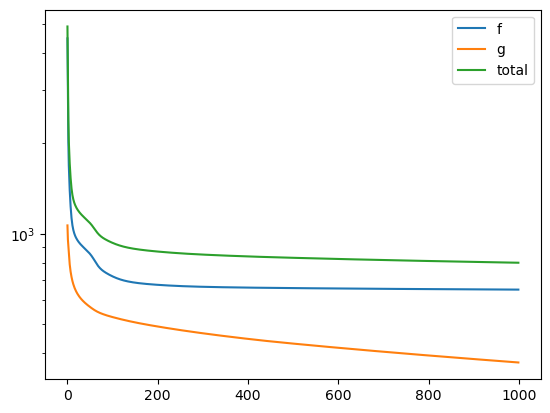

In [14]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_yscale('log')
ax.plot(fscores)
ax.plot(gscores)
ax.plot(fscores + _lambda * gscores)
ax.legend(['f', 'g', 'total'])

In [15]:
W_ins = Wl

n = np.ones(shape=(r, r)) * -1
for i in range(r):
    for j in range(r):
        n[i, j] = np.linalg.norm(W_ins[:, i] - W_ins[:, j])
    n[i, :] = n[i, :] / sum(n[i, :])
    print(n[i, :])

[0.         0.35251212 0.39820742 0.08493724 0.10168991 0.06265331]
[0.16305496 0.         0.26192405 0.18578189 0.20241382 0.18682529]
[0.18480765 0.2628004  0.         0.17846384 0.19098588 0.18294223]
[0.08520409 0.40290786 0.38574646 0.         0.06506818 0.06107342]
[0.09548251 0.41089057 0.38639956 0.06090491 0.         0.04632245]
[0.06452724 0.41598223 0.40597796 0.0627031  0.05080947 0.        ]


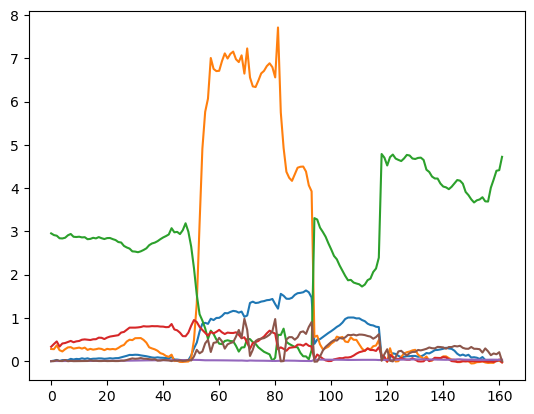

In [16]:
plt.plot(W_ins)

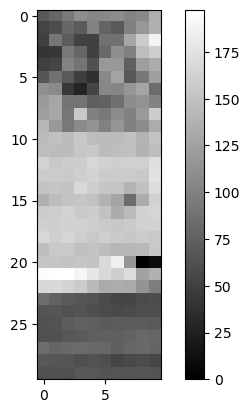

In [17]:
plt.imshow(Hl[0, :].reshape(30, 10, order='F'), cmap='gray')
plt.colorbar()

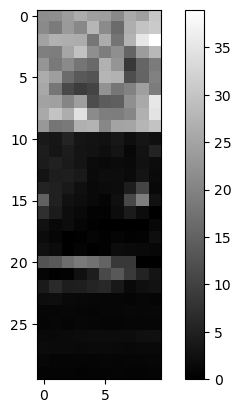

In [18]:
plt.imshow(Hl[1, :].reshape(30, 10, order='F'), cmap='gray')
plt.colorbar()

## Medium scale test, expected r = 3

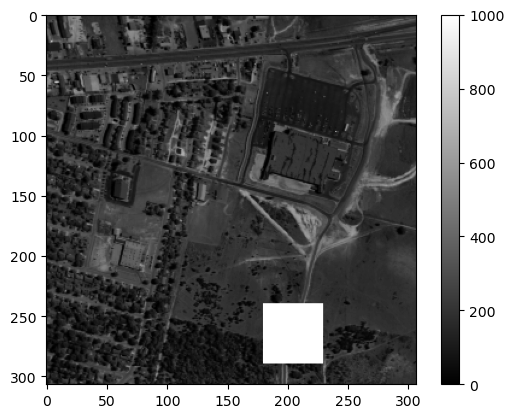

In [19]:
img = X3d[100, :, :].copy()
img[240: 290, 180: 230] = 1000 # trees
plt.imshow(img, cmap='gray')
plt.colorbar()

In [20]:
medX3d = X3d[:, 240: 290, 180: 230] # (162, 50, 50)
medX = medX3d.reshape(m, -1, order='F') # (162, 2500)

In [21]:
m,n = medX.shape
r = 6
W_ini = zeros_mask(np.random.rand(m, r))
H_ini = zeros_mask(np.random.rand(r, n))

In [27]:
_lambda = 1
Wb, Hb, Wl, Hl, fscores, gscores = nmf(medX, Wl.copy(), Hl.copy(), _lambda=_lambda, itermax=1000)

Iteration: 1, f=2209.908019806031, g=564.0801374558049,  total=2773.988157261836
Iteration: 2, f=2209.82282347174, g=563.9738466017626,  total=2773.7966700735024
Iteration: 3, f=2209.7376686863663, g=563.8676466224655,  total=2773.605315308832
Iteration: 4, f=2209.652560122748, g=563.761533016178,  total=2773.414093138926
Iteration: 5, f=2209.5674975941406, g=563.655505030167,  total=2773.223002624308
Iteration: 6, f=2209.4824816863284, g=563.5495631735711,  total=2773.0320448598995
Iteration: 7, f=2209.3975081179624, g=563.4437084457116,  total=2772.841216563674
Iteration: 8, f=2209.312580127411, g=563.3379407653437,  total=2772.6505208927547
Iteration: 9, f=2209.2276993005585, g=563.2322550564598,  total=2772.4599543570184
Iteration: 10, f=2209.1428701248983, g=563.1266540399232,  total=2772.2695241648216
Iteration: 11, f=2209.058093711342, g=563.0211381609391,  total=2772.079231872281
Iteration: 12, f=2208.9733689157088, g=562.9157076430831,  total=2771.889076558792
Iteration: 13, f

Iteration: 100, f=2201.7292336092332, g=553.9693875460341,  total=2755.6986211552676
Iteration: 101, f=2201.6493890613797, g=553.871023180813,  total=2755.520412242193
Iteration: 102, f=2201.569730758258, g=553.7727203161953,  total=2755.3424510744535
Iteration: 103, f=2201.4901733179872, g=553.6744806777424,  total=2755.1646539957296
Iteration: 104, f=2201.4106841917474, g=553.5763044795967,  total=2754.986988671344
Iteration: 105, f=2201.331257866013, g=553.4781913461474,  total=2754.8094492121604
Iteration: 106, f=2201.2518983685063, g=553.3801409133596,  total=2754.632039281866
Iteration: 107, f=2201.1726108683924, g=553.2821529249281,  total=2754.4547637933206
Iteration: 108, f=2201.093399074019, g=553.1842272807189,  total=2754.277626354738
Iteration: 109, f=2201.0142649726245, g=553.0863639828717,  total=2754.100628955496
Iteration: 110, f=2200.9352092777467, g=552.9885631065223,  total=2753.923772384269
Iteration: 111, f=2200.85623112996, g=552.8908249917797,  total=2753.747056

Iteration: 198, f=2194.3087670596237, g=544.6058190390571,  total=2738.914586098681
Iteration: 199, f=2194.2372906431256, g=544.5131132907632,  total=2738.7504039338887
Iteration: 200, f=2194.165903799311, g=544.4204697893849,  total=2738.586373588696
Iteration: 201, f=2194.094606577651, g=544.3278886513876,  total=2738.4224952290388
Iteration: 202, f=2194.0233978114475, g=544.2353700871321,  total=2738.2587678985797
Iteration: 203, f=2193.952276289345, g=544.1429144373428,  total=2738.0951907266876
Iteration: 204, f=2193.881243956957, g=544.0505214405747,  total=2737.9317653975318
Iteration: 205, f=2193.8103015333345, g=543.9581908884701,  total=2737.7684924218047
Iteration: 206, f=2193.7394495021435, g=543.8659226157315,  total=2737.605372117875
Iteration: 207, f=2193.6686881509286, g=543.7737165209592,  total=2737.4424046718877
Iteration: 208, f=2193.598077347787, g=543.6814990563432,  total=2737.2795764041302
Iteration: 209, f=2193.527597730481, g=543.5892934819271,  total=2737.116

Iteration: 296, f=2187.7944362242006, g=535.7703332893622,  total=2723.5647695135626
Iteration: 297, f=2187.7329036890274, g=535.6829859033846,  total=2723.415889592412
Iteration: 298, f=2187.6714576860345, g=535.5956984027545,  total=2723.267156088789
Iteration: 299, f=2187.6100986100128, g=535.5084706763247,  total=2723.1185692863373
Iteration: 300, f=2187.548826706572, g=535.4213025330398,  total=2722.970129239612
Iteration: 301, f=2187.487642295915, g=535.3341937836931,  total=2722.821836079608
Iteration: 302, f=2187.42654521714, g=535.2471390853892,  total=2722.673684302529
Iteration: 303, f=2187.365469429892, g=535.1601315591421,  total=2722.525600989034
Iteration: 304, f=2187.3044820788264, g=535.0731722816952,  total=2722.377654360522
Iteration: 305, f=2187.2436248081362, g=534.986263696694,  total=2722.2298885048303
Iteration: 306, f=2187.182892632611, g=534.8994074502336,  total=2722.082300082845
Iteration: 307, f=2187.122272310062, g=534.8126046767982,  total=2721.9348769868

Iteration: 394, f=2182.241772363884, g=527.4652390969711,  total=2709.707011460855
Iteration: 395, f=2182.19000965172, g=527.3831942990312,  total=2709.573203950751
Iteration: 396, f=2182.138347005295, g=527.3012087757485,  total=2709.4395557810435
Iteration: 397, f=2182.086780792218, g=527.2192829072153,  total=2709.3060636994333
Iteration: 398, f=2182.035307343112, g=527.13741723762,  total=2709.172724580732
Iteration: 399, f=2181.9839257516524, g=527.0556120200565,  total=2709.0395377717086
Iteration: 400, f=2181.932637226163, g=526.9738670193766,  total=2708.9065042455395
Iteration: 401, f=2181.881442144381, g=526.8921820874207,  total=2708.7736242318015
Iteration: 402, f=2181.830340824208, g=526.8105571130028,  total=2708.640897937211
Iteration: 403, f=2181.7793336012296, g=526.7289920398722,  total=2708.5083256411017
Iteration: 404, f=2181.7284206986865, g=526.6474868493351,  total=2708.3759075480216
Iteration: 405, f=2181.6776023905913, g=526.5660415482258,  total=2708.243643938

Iteration: 492, f=2177.612504122875, g=519.7195896892263,  total=2697.3320938121014
Iteration: 493, f=2177.5699104034134, g=519.6435776277218,  total=2697.213488031135
Iteration: 494, f=2177.5273998915404, g=519.5676269158548,  total=2697.0950268073952
Iteration: 495, f=2177.484971056172, g=519.491738514457,  total=2696.9767095706293
Iteration: 496, f=2177.4426220130567, g=519.4159125562455,  total=2696.8585345693023
Iteration: 497, f=2177.400352972318, g=519.3401485186936,  total=2696.740501491012
Iteration: 498, f=2177.3581641918436, g=519.2644459979999,  total=2696.6226101898437
Iteration: 499, f=2177.316055722304, g=519.1888048375725,  total=2696.5048605598768
Iteration: 500, f=2177.274027299903, g=519.1132251830687,  total=2696.3872524829717
Iteration: 501, f=2177.232079176535, g=519.0377072402479,  total=2696.269786416783
Iteration: 502, f=2177.190211541708, g=518.9622509789477,  total=2696.1524625206557
Iteration: 503, f=2177.148424275175, g=518.8868563503027,  total=2696.035280

Iteration: 590, f=2173.8165172287554, g=512.5649093412279,  total=2686.3814265699834
Iteration: 591, f=2173.781724832033, g=512.4950230833728,  total=2686.276747915406
Iteration: 592, f=2173.7469998812603, g=512.4251970132837,  total=2686.172196894544
Iteration: 593, f=2173.712350481367, g=512.3554306843974,  total=2686.0677811657647
Iteration: 594, f=2173.6777805869474, g=512.2857239828181,  total=2685.9635045697655
Iteration: 595, f=2173.643291549989, g=512.2160769231726,  total=2685.859368473162
Iteration: 596, f=2173.6088836723256, g=512.1464894808728,  total=2685.7553731531984
Iteration: 597, f=2173.574556500867, g=512.0769617235857,  total=2685.6515182244525
Iteration: 598, f=2173.54030959119, g=512.0074936269166,  total=2685.5478032181068
Iteration: 599, f=2173.506142673601, g=511.9380852041208,  total=2685.444227877722
Iteration: 600, f=2173.4720556117154, g=511.86873642138977,  total=2685.340792033105
Iteration: 601, f=2173.4380490356752, g=511.79944852307887,  total=2685.2374

Iteration: 688, f=2170.785381607371, g=506.00337227092825,  total=2676.7887538782993
Iteration: 689, f=2170.7581756310287, g=505.9393484214205,  total=2676.6975240524494
Iteration: 690, f=2170.7310395698305, g=505.8753801522729,  total=2676.6064197221035
Iteration: 691, f=2170.7039734242226, g=505.8114672961483,  total=2676.515440720371
Iteration: 692, f=2170.6769772875487, g=505.74760969773905,  total=2676.4245869852875
Iteration: 693, f=2170.6500512393454, g=505.6838071816969,  total=2676.3338584210424
Iteration: 694, f=2170.6231951320738, g=505.6200596571788,  total=2676.2432547892527
Iteration: 695, f=2170.5964090296425, g=505.55636694137706,  total=2676.1527759710198
Iteration: 696, f=2170.5696940188977, g=505.49272906692835,  total=2676.062423085826
Iteration: 697, f=2170.5430479769675, g=505.42914551205945,  total=2675.9721934890267
Iteration: 698, f=2170.5164685450163, g=505.36561585762763,  total=2675.882084402644
Iteration: 699, f=2170.4899672096694, g=505.30213929569265,  to

Iteration: 786, f=2168.4361601446767, g=499.9650381833521,  total=2668.401198328029
Iteration: 787, f=2168.415005670212, g=499.90581106143156,  total=2668.3208167316434
Iteration: 788, f=2168.3939000194437, g=499.84663472124583,  total=2668.2405347406893
Iteration: 789, f=2168.3728422593545, g=499.7875084390994,  total=2668.160350698454
Iteration: 790, f=2168.351832614553, g=499.72843136324923,  total=2668.080263977802
Iteration: 791, f=2168.3308709792195, g=499.66940298085626,  total=2668.000273960076
Iteration: 792, f=2168.3099588284063, g=499.61042272538464,  total=2667.920381553791
Iteration: 793, f=2168.2890980916827, g=499.55149024315597,  total=2667.8405883348387
Iteration: 794, f=2168.2682853639853, g=499.49260609267435,  total=2667.76089145666
Iteration: 795, f=2168.247519127169, g=499.43377015232136,  total=2667.6812892794906
Iteration: 796, f=2168.2267984795517, g=499.37498238497096,  total=2667.601780864523
Iteration: 797, f=2168.206123652278, g=499.3162426110846,  total=26

Iteration: 884, f=2166.576456676314, g=494.3768572592928,  total=2660.953313935607
Iteration: 885, f=2166.559503472441, g=494.3219768446738,  total=2660.881480317115
Iteration: 886, f=2166.542586123198, g=494.26714137580746,  total=2660.8097274990055
Iteration: 887, f=2166.5257046209226, g=494.21235070110816,  total=2660.738055322031
Iteration: 888, f=2166.5088591632307, g=494.15760465858887,  total=2660.6664638218194
Iteration: 889, f=2166.492049811194, g=494.1029030970762,  total=2660.5949529082704
Iteration: 890, f=2166.475277505918, g=494.04824667532154,  total=2660.5235241812393
Iteration: 891, f=2166.4585422113746, g=493.9936361089608,  total=2660.4521783203354
Iteration: 892, f=2166.441843386467, g=493.93907105427746,  total=2660.3809144407446
Iteration: 893, f=2166.425181095865, g=493.88455093530877,  total=2660.3097320311736
Iteration: 894, f=2166.4085554190283, g=493.8300754222991,  total=2660.2386308413274
Iteration: 895, f=2166.3919660055117, g=493.77564428381385,  total=26

Iteration: 981, f=2165.0841930653214, g=489.25082885027285,  total=2654.335021915594
Iteration: 982, f=2165.07024969491, g=489.1999355970704,  total=2654.270185291981
Iteration: 983, f=2165.056333678935, g=489.1490798047737,  total=2654.205413483709
Iteration: 984, f=2165.0424449008265, g=489.0982613672342,  total=2654.1407062680605
Iteration: 985, f=2165.0285835616683, g=489.0474805244282,  total=2654.0760640860963
Iteration: 986, f=2165.01474913174, g=488.99673759768666,  total=2654.0114867294265
Iteration: 987, f=2165.000941858306, g=488.9460322602975,  total=2653.9469741186035
Iteration: 988, f=2164.987161702895, g=488.8953642198417,  total=2653.8825259227365
Iteration: 989, f=2164.973408722235, g=488.8447332554463,  total=2653.818141977681
Iteration: 990, f=2164.959682638951, g=488.7941392870751,  total=2653.7538219260264
Iteration: 991, f=2164.945983688825, g=488.74358217106374,  total=2653.6895658598887
Iteration: 992, f=2164.932312345873, g=488.69306259986996,  total=2653.62537

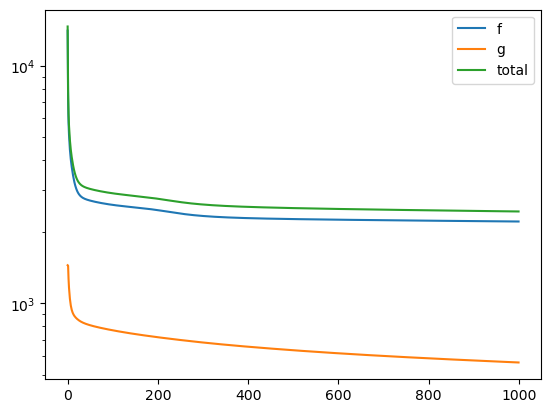

In [23]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_yscale('log')
ax.plot(fscores)
ax.plot(gscores)
ax.plot(fscores + _lambda * gscores)
ax.legend(['f', 'g', 'total'])

In [24]:
W_ins = Wl

n = np.ones(shape=(r, r)) * -1
for i in range(r):
    for j in range(r):
        n[i, j] = np.linalg.norm(W_ins[:, i] - W_ins[:, j])
    n[i, :] = n[i, :] / sum(n[i, :])
    print(n[i, :])

[0.         0.28730558 0.12815848 0.12487039 0.03278066 0.42688489]
[0.1788538  0.         0.14069296 0.17321769 0.17632311 0.33091244]
[0.11026219 0.19444531 0.         0.16909384 0.11305483 0.41314383]
[0.11534468 0.2570255  0.18154598 0.         0.13082832 0.31525552]
[0.03181688 0.27491277 0.12754096 0.13746859 0.         0.4282608 ]
[0.19218857 0.23931821 0.21619159 0.15365312 0.1986485  0.        ]


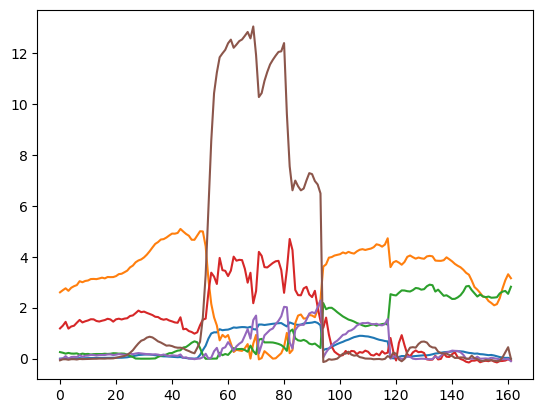

In [25]:
plt.plot(W_ins)

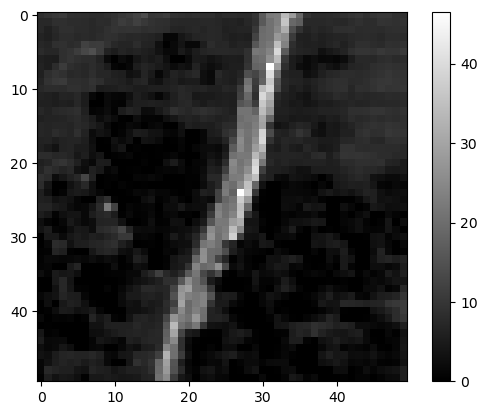

In [29]:
plt.imshow(Hl[1, :].reshape(50, 50, order='F'), cmap='gray')
plt.colorbar()